# Tobig's 19기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [42]:
import pandas as pd
import numpy as np
import random

In [43]:
data = pd.read_csv("C:/Users/MJHwang/Desktop/tobigs/Tobigs20/Week2/assignment_2.csv")
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
# reset_index(): 행 인덱스를 0부터 시작하는 순서로 초기화
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [48]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [49]:
# parameter 개수
N = len(X_train.loc[0]);N

3

In [50]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
# random.random() : 0 이상 1 미만의 무작위 실수 값을 반환하는 함수
# 0 이상 1 미만의 구간에서 균등하게 분포된 랜덤한 실수 값을 생성해 반환함
random_parameters = parameters.copy()
parameters

array([0.62201867, 0.1478798 , 0.60229818])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [51]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i]*parameters[i]
    return z

## Logistic Function

## $p = \frac{1}{1+e^{-z}}$

In [52]:
def logistic(X, parameters):
    z = dot_product(X, parameters) 
    p = 1/(1+np.exp(-z)) # logistic function
    return p

In [53]:
logistic(X_train.iloc[1], parameters) # X_train의 두번째 행에 logistic function 적용시킴

0.6950474770741221

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\Sigma \left( y_i \log{p(X_i)} + (1 - y_i) \log(1 - \{p(X_i)) \right)$

In [54]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = (y * np.log(p) + (1 - y) * np.log(1-p))
    return -loss

In [55]:
def mse_i(X, y, parameters):
    y_hat = np.dot(X, parameters.T) # 행렬곱을 위해 파라미터들 전치시킴
    loss = (y - y_hat) ** 2
    return loss

In [56]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = loss / n #loss 평균값으로 계산
    return loss

In [57]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.1305696627328112

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=$ "..."
## ${\partial\over{\partial \theta_j}}l(p)=$ "..."

In [58]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear': # 선형회귀
        y_hat = np.dot(X, parameters.T)
        gradient = (y - y_hat) * X[j]
    else: # 로지스틱 회귀
        p = logistic(X, parameters)
        gradient = (y - p) * X[j]
    return -gradient

In [59]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.09576999585047749

In [60]:
from IPython.display import Image

Image("C:/Users/rhskr/Desktop/배치알고리즘_구현.png") # 이미지 까먹고 그냥 돌려버림...

FileNotFoundError: No such file or directory: 'C:/Users/rhskr/Desktop/배치알고리즘_구현.png'

FileNotFoundError: No such file or directory: 'C:/Users/rhskr/Desktop/배치알고리즘_구현.png'

<IPython.core.display.Image object>

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [69]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))] # 파라미터의 길이만큼 0으로 구성된 리스트 생성함
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model) # 앞에서 만든 리스트에 넣어줌
    
    return gradients

In [70]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[53.09246535713421, 0.43875951742449154, 36.01186084394267]

## mini-batch
인덱스로 미니 배치 나누기

In [71]:
def batch_idx(X_train, batch_size):
    N = len(X_train) # 전체 데이터 개수
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: batch_idx는 X_train의 인덱스로 미니배치의 인덱스리스트를 반환해주는 함수임. 미니배치는 데이터를 batch size씩 나눈 1개의 부분을 의미하고, batch size는 파라미터를 업데이트할 때 사용되는 데이터의 개수를 의미함. 

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [72]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수, parameters: 업데이트 해야하는 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate / n # learning rate: 학습률
    
    parameters -= gradients
    return parameters

In [73]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.61493318, 0.1478193 , 0.59749373])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 전체 데이터셋을 이용해 학습한 횟수
- num_epoch: 경사하강법을 진행할 총 에포크의 수
<br>

$BGD: \theta = \theta - \text{learning_rate} \times \nabla l(\theta)$
<br>
$SGD: \theta = \theta - \text{learning_rate} \times \nabla l(\theta, (X_i, y_i))$
<br>
$MGD: \theta = \theta - \text{learning_rate} \times \frac{1}{\text{batch_size}} \sum_{i \in \text{batch}} \nabla l(\theta, (X_i, y_i))$

<br>
batch_size에 따른 경사하강법의 종류를 적어주세요
<br>
batch_size=1 -> SGD(확률적 경사하강법)
<br>
batch_size=k -> MGD(미니배치 경사하강법)
<br>
batch_size=whole -> BGD(배치 경사하강법)

In [74]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [75]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size=len(X_train))
new_param_bgd # BGD

epoch: 0  loss: 0.8892125394545128  params: [0.46594295 0.21610409 0.47570757]  gradients: [0.0032408646491360236, 4.688410209634147e-05, 0.0023226346495617283]
epoch: 100  loss: 0.7576375743805278  params: [0.17379411 0.22404996 0.2617047 ]  gradients: [0.002614782388873692, -0.00020356056993321746, 0.0019570231183477925]
epoch: 200  loss: 0.6705776431922208  params: [-0.05886532  0.25590323  0.08390904]  gradients: [0.0020603621352490963, -0.0004212562505463208, 0.0016121426931977468]
epoch: 300  loss: 0.6129844336425173  params: [-0.24138796  0.30615088 -0.06294105]  gradients: [0.0016128535256314655, -0.0005704171146903406, 0.0013411325330410144]
epoch: 400  loss: 0.57328733442636  params: [-0.38447635  0.36798656 -0.18662141]  gradients: [0.0012679883011710435, -0.0006564160639607168, 0.001145647595257117]
epoch: 500  loss: 0.5443544998902698  params: [-0.4974509   0.43602254 -0.29380049]  gradients: [0.0010062061177781047, -0.0006980327816546198, 0.0010071322747799189]
epoch: 600

array([-0.80984183,  0.7832868 , -0.70101953])

In [76]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size=1)
print(new_param_sgd) # SGD

epoch: 0  loss: 0.8501327608802459  params: [ 0.22952439  0.18237914 -0.0513614 ]  gradients: [0.005751611010048023, 0.0031300322129005193, 0.004046780257044794]
epoch: 100  loss: 0.11898453236117755  params: [-1.62960503  3.4692693  -3.30739759]  gradients: [0.0011237909991151007, 0.0006115681365886659, 0.0007906889426838449]
epoch: 200  loss: 0.09707313251983826  params: [-1.78806658  3.98178016 -3.78371019]  gradients: [0.00092649779392246, 0.0005042009856181761, 0.0006518752700923114]
epoch: 300  loss: 0.09077578719204231  params: [-1.84058214  4.15052181 -3.93945955]  gradients: [0.0008690098875484921, 0.00047291601198411486, 0.0006114273114027215]
epoch: 400  loss: 0.08854835267432894  params: [-1.86007042  4.21302958 -3.99702526]  gradients: [0.0008485911067582613, 0.00046180409194815906, 0.0005970608462800843]
epoch: 500  loss: 0.0877062034192401  params: [-1.86757174  4.23707464 -4.01915092]  gradients: [0.0008408596008405893, 0.00045759659903282324, 0.0005916210302963189]
epo

In [77]:
new_param_mgd = gradient_descent(X_train, y_train,  batch_size=10)
print(new_param_mgd) #MGD

epoch: 0  loss: 1.2699259156747629  params: [0.75006263 0.12447662 0.90808838]  gradients: [0.0028938804623973064, 0.004040897435483388, 0.005858165996637114]
epoch: 100  loss: 0.5343641371461401  params: [-0.91953819  0.96537119 -0.88843791]  gradients: [-0.00046594853650624426, -1.992945134184532e-05, 0.0015266468179193477]
epoch: 200  loss: 0.4484062685030753  params: [-1.1118139   1.6687519  -1.57934057]  gradients: [-0.00030081964040047405, -0.00011694070405626528, 0.001045414203250696]
epoch: 300  loss: 0.4045611868283528  params: [-1.23136075  2.12779689 -2.02377304]  gradients: [-0.00014956925525669212, -0.00014446515442719104, 0.0007831662017520287]
epoch: 400  loss: 0.37814956537010747  params: [-1.3237439   2.46012012 -2.34271185]  gradients: [-4.3156715827498444e-05, -0.00015796623253877635, 0.0006161783932523304]
epoch: 500  loss: 0.36045731270927306  params: [-1.39751118  2.71579599 -2.58647001]  gradients: [3.6483634047545535e-05, -0.00016481965155454943, 0.0005003537386

### Predict Label

In [78]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 : # threshold 0.5로 설정
        y_predict.append(1)
    else :
        y_predict.append(0)       
# 0.5를 기준으로 p가 0.5보다 크면 1로, 그렇지 않으면 0으로 예측 값을 결정
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [79]:
from sklearn.metrics import *

In [80]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[40,  0],
       [ 8,  2]], dtype=int64)

In [81]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.84


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [82]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [83]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [84]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.53565238, 2.44629377])

In [86]:
#경사하강법
new_param = gradient_descent(X, y, model = "linear")
new_param

epoch: 0  loss: 0.7017964130605977  params: [1.13638278 0.9241152 ]  gradients: [-0.0002063163958897681, 0.0033073018082970247]
epoch: 100  loss: 1.0045114027621658  params: [0.58188348 2.30940332]  gradients: [0.01227257149092488, 0.023841613427099086]
epoch: 200  loss: 1.0052703924509359  params: [0.58074426 2.31159323]  gradients: [0.012262359552510042, 0.023859724911036367]
epoch: 300  loss: 1.0052716598701312  params: [0.58074236 2.31159688]  gradients: [0.012262342511272076, 0.023859755134691643]
epoch: 400  loss: 1.0052716619851483  params: [0.58074236 2.31159689]  gradients: [0.012262342482834435, 0.023859755185127604]
epoch: 500  loss: 1.0052716619886775  params: [0.58074236 2.31159689]  gradients: [0.012262342482786978, 0.023859755185211756]
epoch: 600  loss: 1.0052716619886837  params: [0.58074236 2.31159689]  gradients: [0.012262342482786896, 0.0238597551852119]
epoch: 700  loss: 1.0052716619886837  params: [0.58074236 2.31159689]  gradients: [0.012262342482786896, 0.023859

array([0.58074236, 2.31159689])

In [87]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

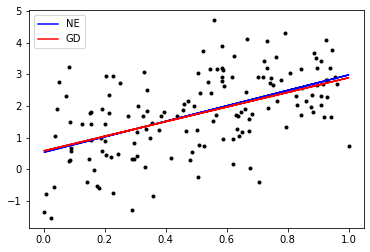

In [88]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()